In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [15]:
palette = ['#003f5c', '#bc5090', '#ffa600', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Wifi rate manager"
labels = ['1 link', '2 links', '3 links']

In [3]:
data = pd.read_csv('manager.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,nLinks,loss,jitter,latency,throughput,rxBytes,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager
0,407456,1,1,1,1,66.896000,0.000244,1.337880,42.5544,669076884,2021136408,650853,1966086,1.01324,1.01324,120.969,120.969,158.9140,870762.00,ns3::MinstrelHtWifiManager
1,407456,2,1,1,1,64.847900,0.000223,1.279980,45.1781,710472388,2021136408,691121,1966086,1.01391,1.01391,120.994,120.994,154.2950,884619.00,ns3::MinstrelHtWifiManager
2,407456,1,1,1,1,55.188700,0.000154,1.067320,57.5872,905696784,2021136408,881028,1966086,1.00947,1.00947,121.000,121.000,135.8130,940335.00,ns3::IdealWifiManager
3,407456,2,1,1,1,54.912700,0.000152,1.060190,57.9491,911276768,2021136408,886456,1966086,1.01735,1.01735,120.993,120.993,135.1760,939810.00,ns3::IdealWifiManager
4,407456,1,1,1,2,55.569200,0.000156,1.073090,57.1016,898006316,2021136408,873547,1966086,1.01531,1.01531,120.999,120.999,136.4940,937393.00,ns3::IdealWifiManager
5,407456,2,1,1,2,55.042000,0.000153,1.063560,57.7793,908661536,2021136408,883912,1966086,1.01694,1.01694,121.000,121.000,135.4430,940093.00,ns3::IdealWifiManager
6,407456,1,1,1,2,66.431900,0.000239,1.321760,43.1401,678456356,2021136408,659977,1966086,1.01032,1.01032,120.996,120.996,157.7450,872330.00,ns3::MinstrelHtWifiManager
7,407456,2,1,1,2,65.797800,0.000232,1.304150,43.9563,691272432,2021136408,672444,1966086,1.01747,1.01747,121.000,121.000,156.1530,876970.00,ns3::MinstrelHtWifiManager
8,407456,1,1,1,1,61.576300,0.000194,1.196320,49.3933,776595404,2021136408,755443,1966086,1.04547,1.04547,121.000,121.000,146.3950,903753.00,ns3::ThompsonSamplingWifiManager
9,407456,2,1,1,1,62.421900,0.000201,1.218060,48.2919,759503876,2021136408,738817,1966086,1.00576,1.00576,120.996,120.996,148.5110,899922.00,ns3::ThompsonSamplingWifiManager


In [5]:
data = data.groupby(['rngRun', 'nStations', 'nLinks', 'distance', 'rateAdaptationManager'])\
           .agg({'latency': 'mean', 
                 'loss': 'mean', 
                 'jitter': 'mean', 
                 'throughput': 'sum'})\
           .reset_index()
data

,rngRun,nStations,nLinks,distance,rateAdaptationManager,latency,loss,jitter,throughput
0,407456,1,1,1,ns3::IdealWifiManager,1.063755,55.050700,0.000153,115.5363
1,407456,1,1,1,ns3::MinstrelHtWifiManager,1.308930,65.871950,0.000234,87.7325
2,407456,1,1,1,ns3::ThompsonSamplingWifiManager,1.207190,61.999100,0.000197,97.6852
3,407456,1,2,1,ns3::IdealWifiManager,1.068325,55.305600,0.000155,114.8809
4,407456,1,2,1,ns3::MinstrelHtWifiManager,1.312955,66.114850,0.000236,87.0964
5,407456,1,2,1,ns3::ThompsonSamplingWifiManager,0.662895,20.612450,0.000031,204.0400
6,407456,1,3,1,ns3::IdealWifiManager,0.335386,10.975229,0.000043,228.8100
7,407456,1,3,1,ns3::MinstrelHtWifiManager,0.459691,22.685923,0.000074,198.7232
8,407456,1,3,1,ns3::ThompsonSamplingWifiManager,0.334105,10.549271,0.000033,229.9030
9,407457,1,1,1,ns3::IdealWifiManager,1.062375,54.986950,0.000153,115.7149


C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\2390375904.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='throughput', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)


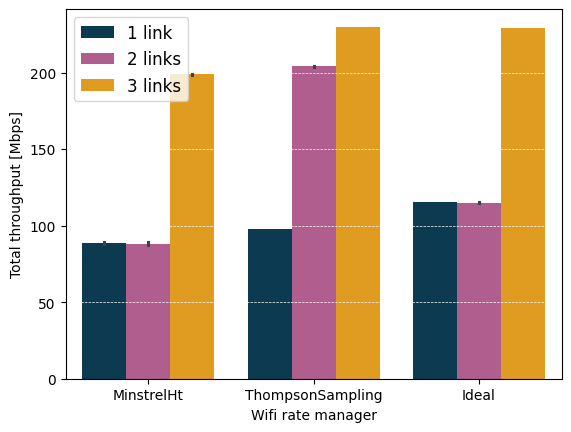

In [19]:
plot_sum = data.groupby(['nStations', 'nLinks', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::IdealWifiManager', 'Ideal')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::MinstrelHtWifiManager', 'MinstrelHt')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::ThompsonSamplingWifiManager', 'ThompsonSampling')
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='throughput', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[0:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
ax.set_ylim(0)  
plt.savefig('manager_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\2587202460.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='loss', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)


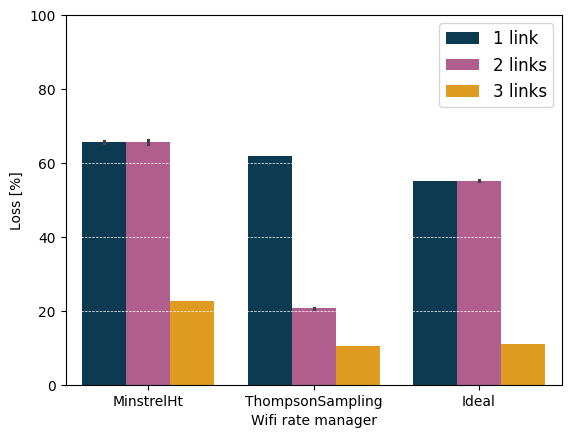

In [21]:
plot_sum = data.groupby(['nStations', 'nLinks', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::IdealWifiManager', 'Ideal')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::MinstrelHtWifiManager', 'MinstrelHt')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::ThompsonSamplingWifiManager', 'ThompsonSampling')
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='loss', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)


handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[0:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Loss [%]')
ax.set_ylim(0, 100)  
plt.savefig('manager_loss.svg', bbox_inches='tight')

In [12]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\1103489353.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='jitter', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)


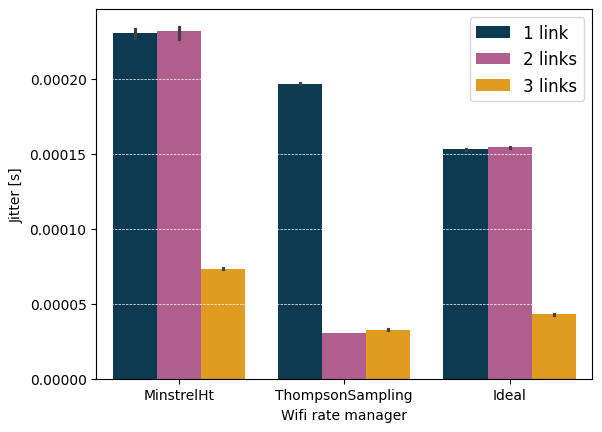

In [22]:
plot_sum = data.groupby(['nStations', 'nLinks', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::IdealWifiManager', 'Ideal')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::MinstrelHtWifiManager', 'MinstrelHt')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::ThompsonSamplingWifiManager', 'ThompsonSampling')
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='jitter', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[0:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
ax.set_ylim(0)  
plt.savefig('manager_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_22728\1810512644.py:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='latency', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)


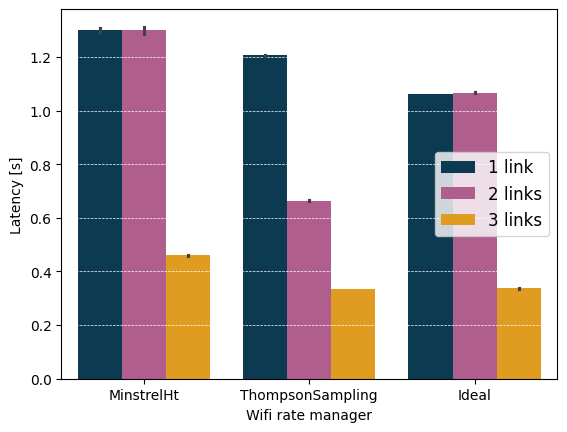

In [23]:
plot_sum = data.groupby(['nStations', 'nLinks', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::IdealWifiManager', 'Ideal')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::MinstrelHtWifiManager', 'MinstrelHt')
plot_sum['rateAdaptationManager'] = plot_sum['rateAdaptationManager'].replace('ns3::ThompsonSamplingWifiManager', 'ThompsonSampling')
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.barplot(data=plot_sum, x='rateAdaptationManager', y='latency', hue='nLinks', errorbar=('ci'), palette=palette, ax=ax,)
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[0:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  
ax.set(xlabel=xlabel, ylabel='Latency [s]')
plt.savefig('manager_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\2836789617.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\2836789617.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber',


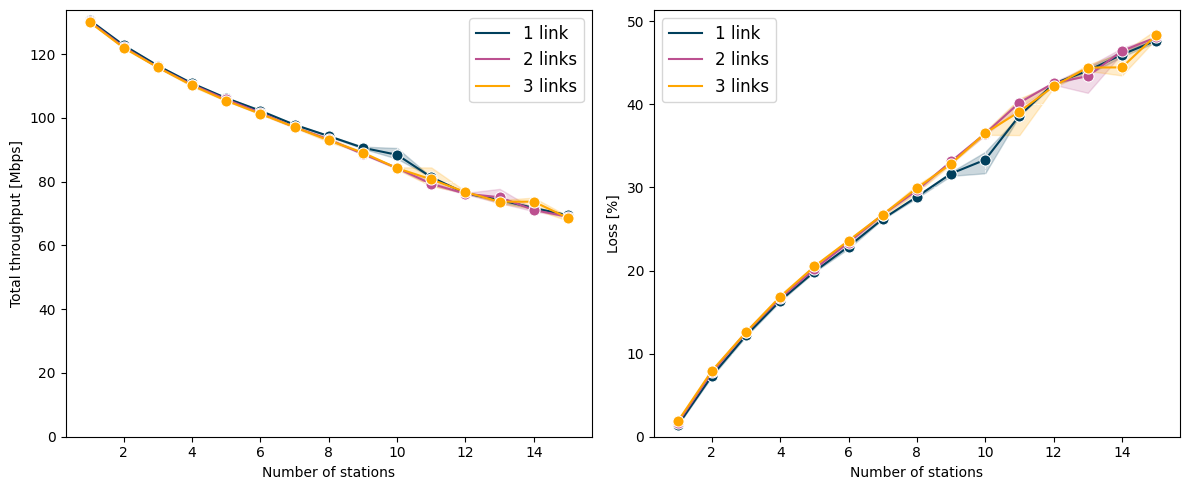

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='distance')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='distance')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('sta_thr_loss.svg', bbox_inches='tight')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\1962070765.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\1962070765.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber',


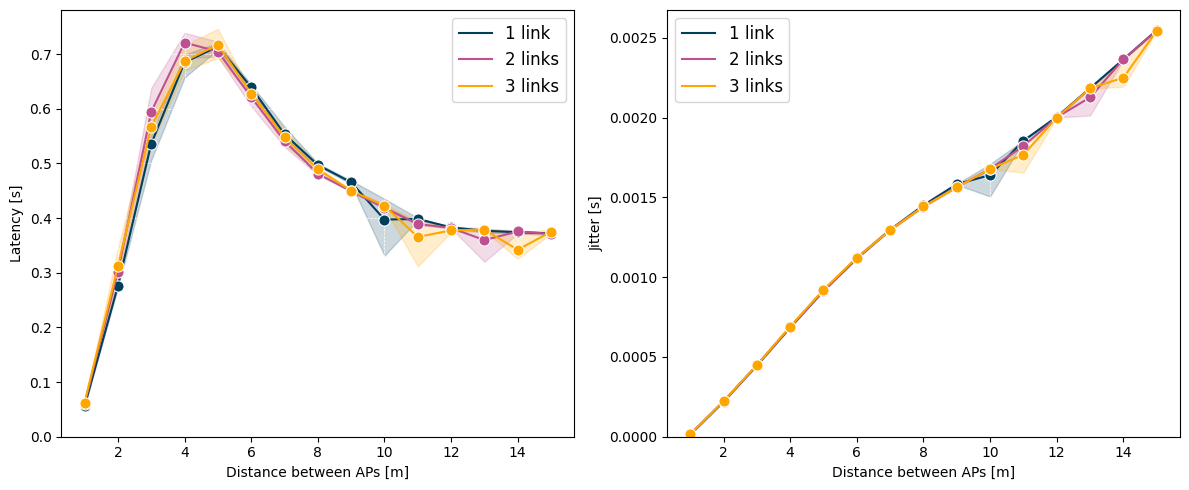

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Latency
sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='distance')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel='Distance between APs [m]', ylabel='Latency [s]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Jitter
sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='distance')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel='Distance between APs [m]', ylabel='Jitter [s]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('sta_lat_jitter.svg', bbox_inches='tight')
plt.show()